# RISK-examples

This notebook, `examples.ipynb`, contains a collection of example scripts demonstrating the use of **RISK**, a Python package designed for biological network analysis. Each example illustrates different features and capabilities of RISK, helping users to explore and analyze biological networks effectively. Whether you're new to RISK or looking to deepen your understanding, these examples will guide you through various use cases and applications.

### Demonstration Using the Yeast PPI Network

In this notebook, we will utilize the comprehensive yeast protein-protein interaction (PPI) network published by Michaelis et al. in 2023. This dataset offers a highly structured interactome of *Saccharomyces cerevisiae*, consisting of 3,927 proteins connected by 31,004 interactions. The network is particularly valuable for exploring complex biological systems and understanding protein interactions at a large scale.

By applying the **RISK** package to this PPI network, we will demonstrate how to perform various analyses, including network clustering, interaction mapping, and identification of key protein complexes. This example will showcase the power of **RISK** in handling and deriving insights from large-scale biological networks.

**Importantly, this specific analysis and demonstration using the yeast PPI network has not been done before.** This makes our exploration both novel and uniquely valuable for researchers working in systems biology and proteomics.


---

## 0. Installing RISK

To get started with **RISK**, you'll need to install `risk-network` using `pip`. Run the following command in a code cell to install the package:


In [3]:
# !pip install risk-network==0.0.3b0


---

## 1. Importing RISK

After installing **RISK**, the next step is to import it into your notebook. You can verify that the installation was successful by checking the version of the package.


In [4]:
import risk

# Check the version of the RISK package to ensure it's installed correctly
risk.__version__


'0.0.3-beta.2'

After verifying that the **RISK** package is installed and properly loaded, the next step is to import the `RISK` class. This class provides the core functionalities for performing biological network analysis.


In [5]:
from risk import RISK


To enable inline plotting in Jupyter notebooks, we'll use the `%matplotlib inline` magic command. This ensures that all plots generated during the analysis are displayed directly within the notebook.


In [6]:
%matplotlib inline


---

## 2. RISK Object Initialization

This code block initializes a **RISK** object with specific parameters. Below is a description of each parameter:

- `compute_sphere` (`bool`, default=`True`): Whether to compute the spherical representation.
- `surface_depth` (`float`, default=`0.0`): Depth of the surface for the analysis.
- `distance_metric` (`str`, default=`"dijkstra"`): Method used to compute distances. Options include `'dijkstra'`, `'louvain'`, `'label_propagation'`, `'markov_clustering'`, `'walktrap'`, and `'spinglass'`.
- `louvain_resolution` (`float`, default=`0.1`): Resolution parameter for the Louvain method.
- `min_edges_per_node` (`int`, default=`0`): Minimum number of edges per node.
- `edge_length_threshold` (`float`, default=`0.5`): Threshold for edge lengths, where the value ranges from 0 to 1.
- `include_edge_weight` (`bool`, default=`True`): Whether to include edge weights in the analysis.
- `weight_label` (`str`, default=`"weight"`): Label for the edge weight attribute.


In [7]:
# Initialize the RISK object with specific parameters

risk = RISK(
    compute_sphere=True,  #  Whether to compute node distances as a spherical representation (default is True)
    surface_depth=0.5,  #  Depth of the surface for the analysis (default is 0.0)
    distance_metric="dijkstra",  #  Method used to compute distances (default is "dijkstra"). 
                                          #  OPTIONS: 'dijkstra', 'louvain', 'label_propagation', 
                                          #  'markov_clustering', 'walktrap', 'spinglass'
    louvain_resolution=0.01,  #  Resolution parameter for the Louvain method (default is 0.1)
    min_edges_per_node=0,  #  Minimum number of edges per node (default is 0)
    edge_length_threshold=0.25,  #  Threshold for edge lengths, between 0 to 1 (default is 0.5)
    include_edge_weight=False,  #  Whether to include edge weights in the analysis (default is True)
    weight_label="weight",  #  Label for the edge weight attribute (default is "weight")
)


---

## 3. Loading Graph Data for RISK Analysis

In this section, we demonstrate various methods for loading graph data into the **RISK** package, enabling comprehensive biological network analysis. The **RISK** package supports multiple input formats, providing flexibility in how you bring your network data into the framework. Below are examples of how to load networks from different sources:

- **Cytoscape Files (`.cys`)**: You can load networks directly from Cytoscape files using the `load_cytoscape_network` method. This method is particularly useful when working with complex networks that have been visualized or processed in Cytoscape. You can specify the source and target node labels, and optionally choose a specific view from the file.

- **Cytoscape JSON Files (`.cyjs`)**: If you have network data saved in a Cytoscape JSON format, the `load_cytoscape_json_network` method allows you to import the network while specifying the source and target labels to ensure correct interpretation of nodes and edges.

- **GPickle Files (`.gpickle`)**: Networks serialized into a `.gpickle` format can be easily reloaded using the `load_gpickle_network` method. This approach is ideal for preserving and reloading complex network structures without data loss.

- **NetworkX Graphs**: For those who have networks in a NetworkX graph object, the `load_networkx_network` method enables conversion to a RISK-compatible format. This optional step is convenient for integrating existing NetworkX-based workflows with the RISK package.


### Cytoscape Files (.cys)

In [8]:
# Load the network from a Cytoscape file for RISK analysis

network = risk.load_cytoscape_network(
    filepath='./data/cytoscape/michaelis_2023.cys',  # Path to the Cytoscape file containing the network
    source_label="source",  # Attribute in the file representing the source nodes (e.g., starting points of edges)
    target_label="target",  # Attribute in the file representing the target nodes (e.g., endpoints of edges)
    view_name="",  # Name of the specific view to load from the file, leave empty to load the default view
)


---------------
Loading network
---------------
Filetype: Cytoscape
Filepath: ./data/cytoscape/michaelis_2023.cys
Projection: Sphere
Surface depth: 0.5
Edge length threshold: 0.25
Edge weight: Excluded
Minimum edges per node: 0


### Cytoscape JSON Files (.cyjs)

In [6]:
# Load the network from a Cytoscape JSON file for RISK analysis

network = risk.load_cytoscape_json_network(
    filepath='./data/cyjs/michaelis_2023.cyjs',  # Path to the Cytoscape JSON file containing the network
    source_label="source",  # Label for the source nodes in the network (e.g., the starting point of edges)
    target_label="target",  # Label for the target nodes in the network (e.g., the endpoint of edges)
)


---------------
Loading network
---------------
Filetype: Cytoscape JSON
Filepath: ./data/cyjs/michaelis_2023.cyjs
Project to sphere: True
Surface depth: 0.5
Edge length threshold: 0.25
Include edge weights: False
Minimum edges per node: 0


### GPickle Files (.gpickle)

In [7]:
# Load the network from a GPickle file for RISK analysis

network = risk.load_gpickle_network(
    filepath='./data/gpickle/michaelis_2023.gpickle',  # Path to the gpickle file containing the pre-saved network
)


---------------
Loading network
---------------
Filetype: GPickle
Filepath: ./data/gpickle/michaelis_2023.gpickle
Project to sphere: True
Surface depth: 0.5
Edge length threshold: 0.25
Include edge weights: False
Minimum edges per node: 0


### NetworkX Graphs

In [8]:
# Load the network from a NetworkX graph for RISK analysis

network = risk.load_networkx_network(
    G=network  # The NetworkX graph object to be converted for use with the RISK package
)


---------------
Loading network
---------------
Filetype: NetworkX
Project to sphere: True
Surface depth: 0.5
Edge length threshold: 0.25
Include edge weights: False
Minimum edges per node: 0


---

## 4. Loading and Associating Annotations with the Network

In this section, we demonstrate how to load various types of annotations and associate them with the network for comprehensive analysis using the **RISK** package. Annotations provide additional context to the network by linking nodes to specific biological terms, such as Gene Ontology (GO) terms.

### Supported Annotation Formats:
1. **JSON Annotations**:
   - Load annotations stored in a JSON file and associate them with the network.
   - Example: GO Biological Process (BP) annotations stored in `go_biological_process.json`.

2. **CSV Annotations**:
   - Load annotations stored in a CSV file, where columns are separated by a custom delimiter.
   - Example: GO Biological Process (BP) annotations stored in `go_biological_process.csv`.

3. **TSV Annotations**:
   - Load annotations stored in a TSV file, using tab-separated values for the columns.
   - Example: GO Biological Process (BP) annotations stored in `go_biological_process.tsv`.

4. **Excel Annotations**:
   - Load annotations from a specified sheet in an Excel file, allowing integration of data stored in spreadsheets.
   - Example: GO Biological Process (BP) annotations stored in `go_biological_process.xlsx`.

### Parameters:
- **`label_colname`**: Specifies the column containing the labels, such as GO terms.
- **`nodes_colname`**: Specifies the column containing the nodes associated with each label.
- **`nodes_delimiter`**: Defines the delimiter used to separate multiple nodes within the nodes column, allowing flexibility in how annotations are structured.


In [9]:
# Load GO Biological Process (BP) annotations from a JSON file and associate them with the existing network

annotations = risk.load_json_annotations(
    filepath='./data/json/annotations/go_biological_process.json',  # Path to the JSON file containing GO BP annotations
    network=network,  # The network object to which the GO BP annotations will be associated
)

# Note: You can also load other GO annotations, such as:
# - 'go_cellular_component.json' for GO Cellular Component (CC) annotations
# - 'go_molecular_function.json' for GO Molecular Function (MF) annotations


-------------------
Loading annotations
-------------------
Filetype: JSON
Filepath: ./data/json/annotations/go_biological_process.json


In [13]:
# Load GO Biological Process (BP) annotations from a CSV file and associate them with the existing network

annotations = risk.load_csv_annotation(
    filepath='./data/csv/annotations/go_biological_process.csv',  # Path to the CSV file containing GO BP annotations
    network=network,  # The network object to which the GO BP annotations will be associated
    label_colname="label",  # The column name in the CSV file that contains the labels (e.g., GO terms)
    nodes_colname="nodes",  # The column name in the CSV file that contains the nodes associated with each label
    nodes_delimiter=";",  # The delimiter used to separate nodes in the 'nodes' column
)

# Note: You can also load other GO annotations using similar filenames, such as:
# - 'go_cellular_component.csv' for GO Cellular Component (CC) annotations
# - 'go_molecular_function.csv' for GO Molecular Function (MF) annotations


-------------------
Loading annotations
-------------------
Filetype: CSV
Filepath: ./data/csv/annotations/go_biological_process.csv


In [14]:
# Load GO Biological Process (BP) annotations from a TSV file and associate them with the existing network

annotations = risk.load_tsv_annotation(
    filepath='./data/tsv/annotations/go_biological_process.tsv',  # Path to the TSV file containing GO BP annotations
    network=network,  # The network object to which the GO BP annotations will be associated
    label_colname="label",  # The column name in the TSV file that contains the labels (e.g., GO terms)
    nodes_colname="nodes",  # The column name in the TSV file that contains the nodes associated with each label
    nodes_delimiter=";",  # The delimiter used to separate nodes in the 'nodes' column
)

# Note: You can also load other GO annotations using similar filenames, such as:
# - 'go_cellular_component.tsv' for GO Cellular Component (CC) annotations
# - 'go_molecular_function.tsv' for GO Molecular Function (MF) annotations


-------------------
Loading annotations
-------------------
Filetype: TSV
Filepath: ./data/tsv/annotations/go_biological_process.tsv


In [15]:
# Load GO Biological Process (BP) annotations from an Excel file and associate them with the existing network

annotations = risk.load_excel_annotation(
    filepath='./data/excel/annotations/go_biological_process.xlsx',  # Path to the Excel file containing GO BP annotations
    network=network,  # The network object to which the GO BP annotations will be associated
    label_colname="label",  # The column name in the Excel sheet that contains the labels (e.g., GO terms)
    nodes_colname="nodes",  # The column name in the Excel sheet that contains the nodes associated with each label
    sheet_name="Sheet1",  # The name of the sheet in the Excel file from which to load the annotations
    nodes_delimiter=";",  # The delimiter used to separate nodes in the 'nodes' column
)

# Note: You can also load other GO annotations using similar filenames, such as:
# - 'go_cellular_component.xlsx' for GO Cellular Component (CC) annotations
# - 'go_molecular_function.xlsx' for GO Molecular Function (MF) annotations


-------------------
Loading annotations
-------------------
Filetype: Excel
Filepath: ./data/excel/annotations/go_biological_process.xlsx


---

## 5. Annotation Enrichment Calculation

In this section, we compute the enrichment of annotations within the network's neighborhoods. Enrichment analysis is crucial for identifying significant associations between network nodes and biological terms (e.g., GO terms). This process involves calculating P-values for the neighborhoods, which represent the probability that the observed associations occurred by chance.

### Key Parameters:
- **`score_metric`**: Specifies the metric used to score the neighborhoods. Available options include:
  - `sum`: Sum of annotation scores.
  - `stdev`: Standard deviation of annotation scores.
  - `z_score`: Z-score based on the null distribution.
  
- **`null_distribution`**: Defines the type of null distribution to use for comparison. Options include:
  - `network`: Randomly permuted network structure.
  - `annotations`: Randomly permuted annotations.
  
- **`num_permutations`**: Number of permutations used to generate the null distribution for P-value calculation.
- **`random_seed`**: Sets the seed for random number generation to ensure reproducibility.
- **`max_workers`**: Specifies the number of parallel workers used for computation, improving performance on multicore systems.


In [10]:
# Perform annotation enrichment analysis by computing P-values for network neighborhoods

neighborhoods = risk.load_neighborhoods(
    network=network,  # The network object for which to calculate neighborhood enrichment
    annotations=annotations,  # The annotations linked to the network for enrichment analysis
    score_metric="stdev",  # Metric used to score neighborhoods; options: 'sum', 'stdev', 'z_score'
    null_distribution="network",  # Null distribution type; options: 'network', 'annotations'
    num_permutations=100,  # Number of permutations for generating the null distribution, affects P-value accuracy
    random_seed=887,  # Seed for random number generation to ensure reproducibility
    max_workers=4,  # Number of parallel workers for computation, improves performance on multicore systems
)


------------------------
Running permutation test
------------------------
Distance metric: 'dijkstra'
Null distribution: 'network'
Neighborhood scoring metric: 'stdev'
Number of permutations: 100


Total progress: 100%|█████████████████████████| 100/100 [00:21<00:00,  4.75it/s]


---

## 6. Loading and Visualizing the Network Graph

The `load_graph` function in **RISK** allows you to generate a `NetworkGraph` object for visualization and analysis of the network. This function integrates various network components, such as annotations and neighborhood scores, and provides options to customize the clustering and visualization parameters.

### Function Parameters

- **`network`**: The network object containing the nodes and edges to be analyzed.
- **`annotations`**: The annotations associated with the network, typically derived from biological or functional data.
- **`neighborhoods`**: The neighborhoods object, which contains data on enrichment or depletion analysis.

### Statistical Options

- **`tail`**: Specifies the tail of the statistical test to use.
  - **Options**: 
    - `'right'`: For enrichment.
    - `'left'`: For depletion.
    - `'both'`: For two-tailed analysis.
- **`pval_cutoff`**: A cutoff value for p-values to determine significance.
  - **Range**: Any value between 0 to 1.
- **`fdr_cutoff`**: The cutoff value for FDR-corrected p-values.
  - **Range**: Any value between 0 to 1.

### Graph Customization Options

- **`impute_depth`**: Specifies the depth at which to impute missing values.
  - **Range**: Any value between 0 to 1.
- **`prune_threshold`**: Threshold for pruning weak edges from the network graph.
  - **Range**: Any value between 0 to 1.
- **`linkage_criterion`**: The criterion to use for clustering.
  - **Options**: 
    - `'distance'`: Clusters are formed based on distance.
    - `'maxclust'`: Clusters are formed based on the maximum number of clusters.
- **`linkage_method`**: The method used for hierarchical clustering.
  - **Options**: 
    - `'auto'`: Automatically determines the optimal method.
    - Other options: `'single'`, `'complete'`, `'average'`, `'weighted'`, `'centroid'`, `'median'`, `'ward'`.
- **`linkage_metric`**: The distance metric used for clustering.
  - **Options**: 
    - `'auto'`: Automatically determines the optimal metric.
    - Other options include: `'braycurtis'`, `'canberra'`, `'chebyshev'`, `'cityblock'`, `'correlation'`, `'cosine'`, `'dice'`, `'euclidean'`, `'hamming'`, `'jaccard'`, `'jensenshannon'`, `'kulczynski1'`, `'mahalanobis'`, `'matching'`, `'minkowski'`, `'rogerstanimoto'`, `'russellrao'`, `'seuclidean'`, `'sokalmichener'`, `'sokalsneath'`, `'sqeuclidean'`, `'yule'`.
- **`min_cluster_size`**: The minimum size of clusters to be formed.
- **`max_cluster_size`**: The maximum size of clusters to be formed.

In [11]:
# Get the NetworkGraph object for plotting

graph = risk.load_graph(
    network=network,  # The network object containing the nodes and edges to be analyzed
    annotations=annotations,  # The annotations associated with the network, typically derived from biological or functional data
    neighborhoods=neighborhoods,  # The neighborhoods object for enrichment/depletion analysis
    tail="right",  # OPTIONS: right (enrichment), left (depletion), both; specifies the tail of the statistical test
    pval_cutoff=0.01,  # OPTIONS: Any value between 0 to 1; cutoff for p-values to determine significance
    fdr_cutoff=0.999,  # OPTIONS: Any value between 0 to 1; cutoff value for FDR-corrected p-values
    impute_depth=0,  # Specifies the depth at which to impute missing values
    prune_threshold=0.1,  # OPTIONS: Any value between 0 to 1; threshold for pruning weak edges from the network graph
    linkage_criterion="distance",  # OPTIONS: distance, maxclust; criterion used for clustering
    linkage_method="average",  # OPTIONS: auto (automatically selects the optimal method), 
                               # single, complete, average, weighted, centroid, median, ward;
                               # specifies the method for hierarchical clustering
    linkage_metric="yule",  # OPTIONS: auto (automatically selects the optimal metric), 
                            # braycurtis, canberra, chebyshev, cityblock, correlation, cosine,
                            # dice, euclidean, hamming, jaccard, jensenshannon, kulczynski1,
                            # mahalanobis, matching, minkowski, rogerstanimoto, russellrao,
                            # seuclidean, sokalmichener, sokalsneath, sqeuclidean, yule;
                            # specifies the distance metric used for clustering
    min_cluster_size=5,  # The minimum size of clusters to be formed
    max_cluster_size=1000,  # The maximum size of clusters to be formed
)


---------------------------------
Finding significant neighborhoods
---------------------------------
P-value cutoff: 0.01
FDR BH cutoff: 0.999
Significance tail: 'right' (enrichment)
------------------------
Processing neighborhoods
------------------------
Imputation depth: 0
Pruning threshold: 0.1
-----------------------
Finding top annotations
-----------------------
Min cluster size: 5
Max cluster size: 1000
-----------------------------------------
Optimizing distance threshold for domains
-----------------------------------------


Evaluating optimal linkage method and metric: 100%|██████████| 1/1 [00:04<00:00]


Linkage criterion: 'distance'
Linkage method: 'average'
Linkage metric: 'yule'
Optimal linkage threshold: 0.251


---

## 7. Initializing the NetworkPlotter

The `load_plotter` function in **RISK** initializes the `NetworkPlotter` object, which is used to visualize the network graph. You can customize various aspects of the plot, including the figure size, background color, and outline.

### Function Parameters

- **`graph`**: The `NetworkGraph` object that contains the network structure to be visualized.
- **`figsize`**: The size of the figure in inches.
- **`background_color`**: The background color of the plot.
- **`plot_outline`**: Whether to draw an outline around the network.
- **`outline_color`**: The color of the outline.
- **`outline_scale`**: The scale factor for the outline.
  - **Range**: Any value greater than 0.


In [12]:
# Turn interactive plotting off - this enables the graph to be built across multiple cells

import matplotlib.pyplot as plt

plt.ioff()


In [14]:
# Initialize the NetworkPlotter with the NetworkGraph object

plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
    plot_outline=True,
    outline_color="white",
    outline_scale=1.05,
)


---------------
Loading plotter
---------------


## 7a. Plotting Network Nodes and Edges

The `plot_network` function in **RISK** allows you to visualize the network nodes and edges with various customization options.

### Function Parameters

- **`node_size`**: The size of the nodes in the plot.
- **`edge_width`**: The width of the edges in the plot.
- **`node_color`**: The color of the nodes in the plot.
- **`node_edgecolor`**: The color of the edges around each node.
- **`edge_color`**: The color of the edges connecting the nodes.
- **`node_shape`**: The shape of the nodes.
  - **Options**: 
    - `'o'`: Circle.
    - `'s'`: Square.
    - `'^'`: Triangle up.
    - `'v'`: Triangle down.
    - Other options include: `'p'`, `'P'`, `'h'`, `'H'`, `'8'`, `'d'`, `'D'`, `'>'`, `'<`, `'|'`, `'_'`.


In [15]:
# Optional: Plot network nodes and edges

plotter.plot_network(
    node_size=plotter.get_annotated_node_sizes(
        enriched_nodesize=100,
        nonenriched_nodesize=0
    ),
    edge_width=0.0,
    node_color=plotter.get_annotated_node_colors(
        cmap="gist_rainbow",
        min_scale=0.5,
        max_scale=1.0,
        nonenriched_color="white",
        random_seed=887,
    ),
    node_edgecolor="black",
    edge_color="white",
    node_shape="o",
)


## 7a. Plotting a Subnetwork

The `plot_subnetwork` function in **RISK** allows you to focus on and visualize a subset of the network nodes and their connecting edges.

### Function Parameters

- **`nodes`**: The list of node identifiers to include in the subnetwork plot.
- **`node_size`**: The size of the nodes in the subnetwork plot.
- **`edge_width`**: The width of the edges in the subnetwork plot.
- **`node_color`**: The color of the nodes in the subnetwork plot.
- **`node_edgecolor`**: The color of the edges around each node.
- **`edge_color`**: The color of the edges connecting the nodes.
- **`node_shape`**: The shape of the nodes in the subnetwork plot.
  - **Options**: 
    - `'o'`: Circle.
    - `'s'`: Square.
    - `'^'`: Triangle up.
    - `'v'`: Triangle down.
    - Other options include: `'p'`, `'P'`, `'h'`, `'H'`, `'8'`, `'d'`, `'D'`, `'>'`, `'<`, `'|'`, `'_'`.


In [16]:
# Optional: Plot network nodes and edges

plotter.plot_subnetwork(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],
    node_size=250,
    edge_width=0.0,
    node_color="skyblue",
    node_edgecolor="black",
    edge_color="white",
    node_shape="^",
)


## 7b. Plotting Contours

The `plot_contours` function in **RISK** allows you to visualize density contours around the network nodes. This can help in identifying regions of high node density or clustering within the network.

### Function Parameters

- **`levels`**: The number of contour levels to draw.
  - **Range**: Integer value specifying the number of levels.
- **`bandwidth`**: The bandwidth used for kernel density estimation.
  - **Range**: Float value, typically between 0 and 1.
- **`grid_size`**: The size of the grid used for contour plotting.
  - **Range**: Integer value.
- **`alpha`**: The transparency level of the contours.
  - **Range**: Float value between 0 (fully transparent) and 1 (fully opaque).
- **`color`**: The color of the contours, which can be customized or automatically generated based on a colormap.


In [17]:
# Optional: Plot contours

plotter.plot_contours(
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    alpha=0.2,
    color=plotter.get_annotated_contour_colors(cmap="hsv", random_seed=887),
)


## 7b. Plotting a Subcontour

The `plot_subcontour` function in **RISK** allows you to focus on and visualize the contours around a specific subset of nodes within the network. This can be useful for highlighting particular pathways or regions of interest.

### Function Parameters

- **`nodes`**: The list of node identifiers to include in the subcontour plot.
- **`levels`**: The number of contour levels to draw.
  - **Range**: Integer value specifying the number of levels.
- **`bandwidth`**: The bandwidth used for kernel density estimation.
  - **Range**: Float value, typically between 0 and 1.
- **`grid_size`**: The size of the grid used for contour plotting.
  - **Range**: Integer value.
- **`alpha`**: The transparency level of the contours.
  - **Range**: Float value between 0 (fully transparent) and 1 (fully opaque).
- **`color`**: The color of the contours, which can be specified directly.


In [18]:
# Optional: Plot subcontours

plotter.plot_subcontour(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    alpha=0.2,
    color="white",
)


### 7c. Optional: Plot Labels

The `plot_labels` method in the `NetworkPlotter` class is used to annotate the network with labels. This function provides various customization options to adjust the appearance and placement of labels within the network graph.

#### Function Parameters

- **`perimeter_scale`**: Scaling factor for the perimeter around the network where labels may be placed.
  - **Range**: Any value greater than 0.
- **`offset`**: The offset distance for label placement relative to the nodes.
  - **Range**: Any value greater than 0.
- **`font`**: The font to use for the labels.
  - **Options**: Any valid font name (e.g., "Arial", "Times New Roman").
- **`fontsize`**: The size of the font used for the labels.
  - **Options**: Any integer value representing font size.
- **`fontcolor`**: The color of the font used for the labels.
  - **Options**: Any valid color name or hex code (e.g., "white", "#FFFFFF").
- **`arrow_linewidth`**: The width of the arrow lines used to point to nodes.
  - **Options**: Any value greater than 0.
- **`arrow_color`**: The color of the arrow lines used to point to nodes.
  - **Options**: Any valid color name or hex code (e.g., "white", "#FFFFFF").
- **`num_words`**: The maximum number of words to include in each label.
  - **Options**: Any integer value representing the number of words.
- **`min_words`**: The minimum number of words to include in each label.
  - **Options**: Any integer value representing the number of words.


In [19]:
# Optional: Plot labels on the network

plotter.plot_labels(
    perimeter_scale=1.25,  # Scale factor for the perimeter around the network where labels can be placed
    offset=0.10,  # Distance offset for label placement relative to the nodes
    font="Arial",  # Font type to use for the labels
    fontsize=10,  # Size of the font for the labels
    fontcolor="white",  # Color of the font for the labels
    arrow_linewidth=1,  # Width of the arrows pointing to the nodes
    arrow_color="white",  # Color of the arrows pointing to the nodes
    num_words=6,  # Maximum number of words to include in each label
    min_words=2,  # Minimum number of words to include in each label
)


### 7d. Plotting Utility Methods in NetworkPlotter

The `NetworkPlotter` class provides several static methods to manage the display, saving, and closing of plots. These methods directly interface with matplotlib functions, allowing for easy integration into plotting workflows.

#### `savefig` Method

The `savefig` method saves the current plot to a file. You can specify the filename, format, and other options.

- **Function**: `savefig(*args, **kwargs)`
- **Description**: Saves the current plot to a file.
- **Arguments**:
  - `*args`: Positional arguments passed to `plt.savefig`.
  - `**kwargs`: Keyword arguments passed to `plt.savefig`, such as filename and format.

#### `show` Method

The `show` method displays the current plot. This is typically the last step after configuring your plot.

- **Function**: `show(*args, **kwargs)`
- **Description**: Displays the current plot.
- **Arguments**:
  - `*args`: Positional arguments passed to `plt.show`.
  - `**kwargs`: Keyword arguments passed to `plt.show`.


In [20]:
# Optional: Save the plot to a file

# plotter.savefig("network_plot.png")


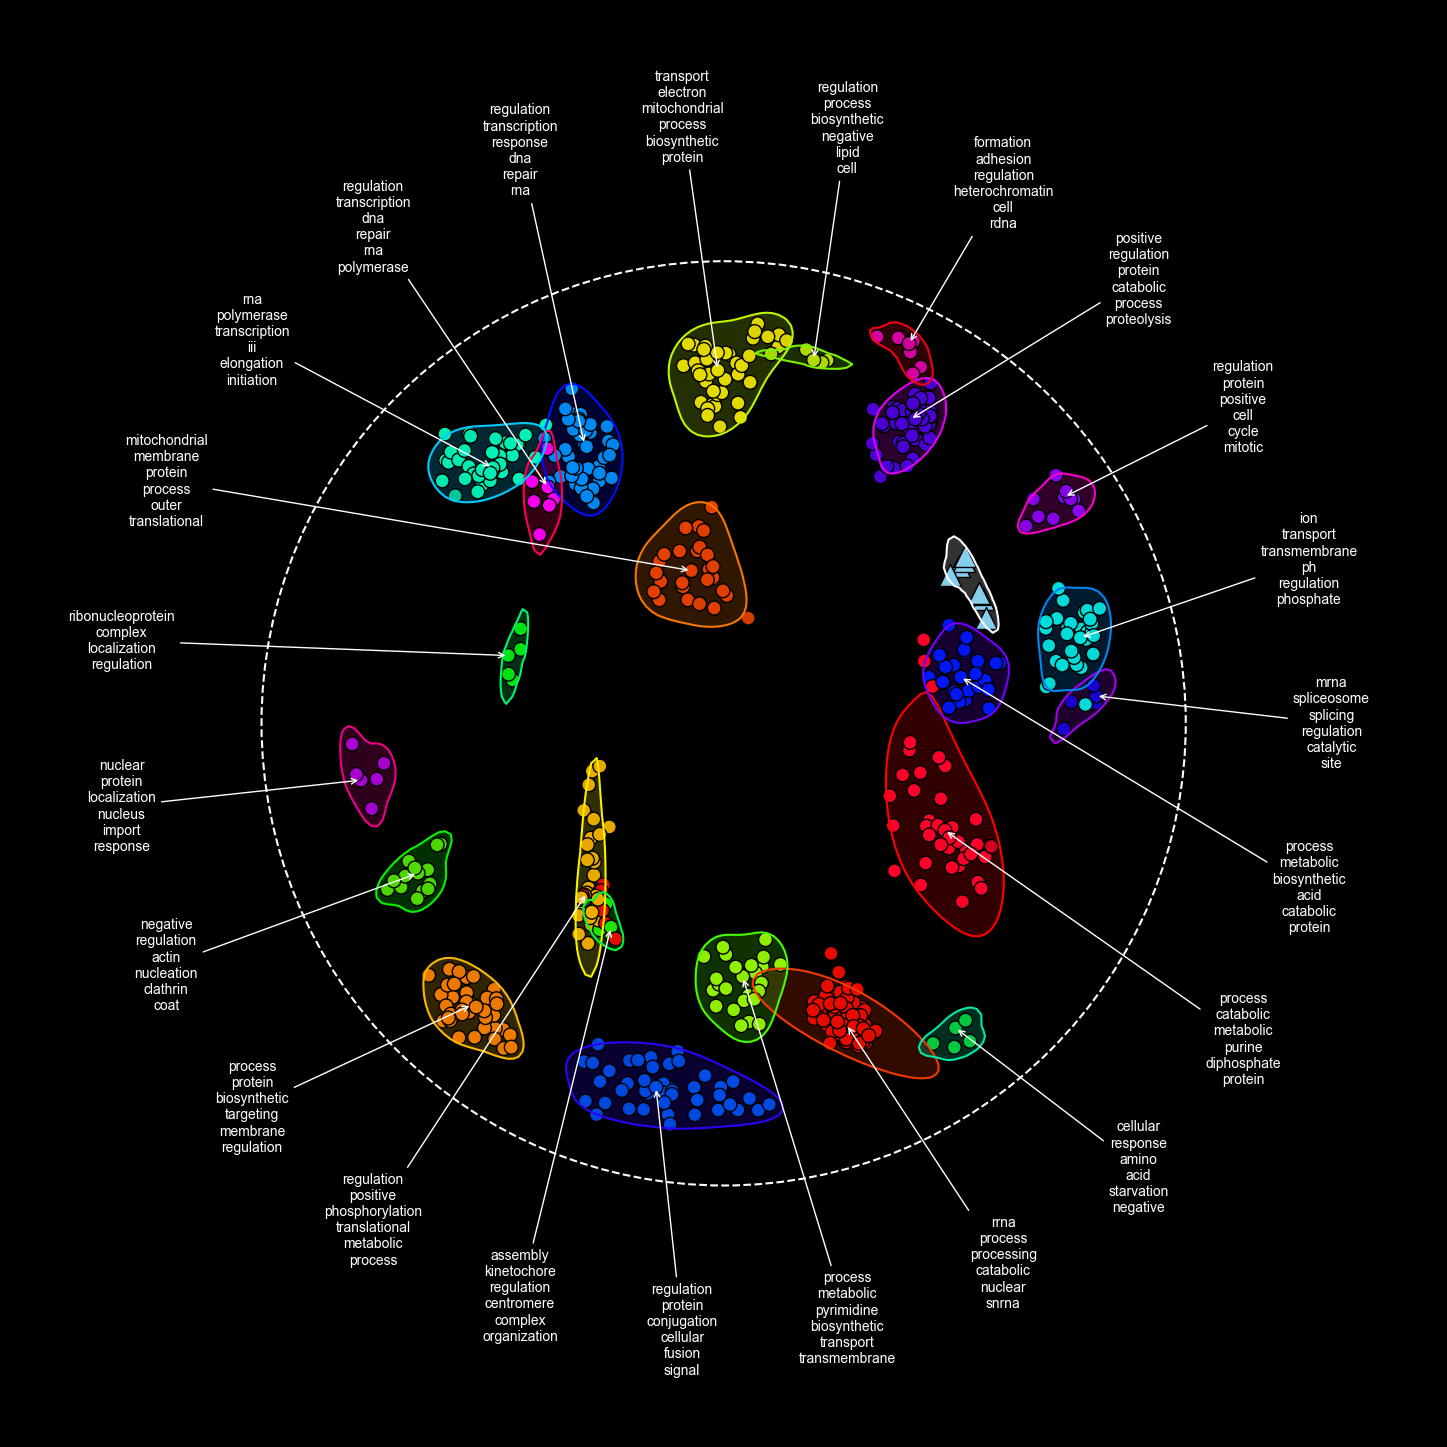

In [21]:
# Display the plot

plotter.show()


---

## 7. [Troubleshoot] Potential Plotting Issue in Jupyter Notebooks

When using the `NetworkPlotter` class in a Jupyter Notebook, you might encounter an issue where the plot is automatically displayed when the `plt.subplots` function is called during the initialization of the plot. This behavior can cause the plot to appear prematurely in the execution cell where it's called, even if you intend to display it later using `plotter.show()`.

If this occurs, refer to the following cell to correctly display the plot.


---------------
Loading plotter
---------------


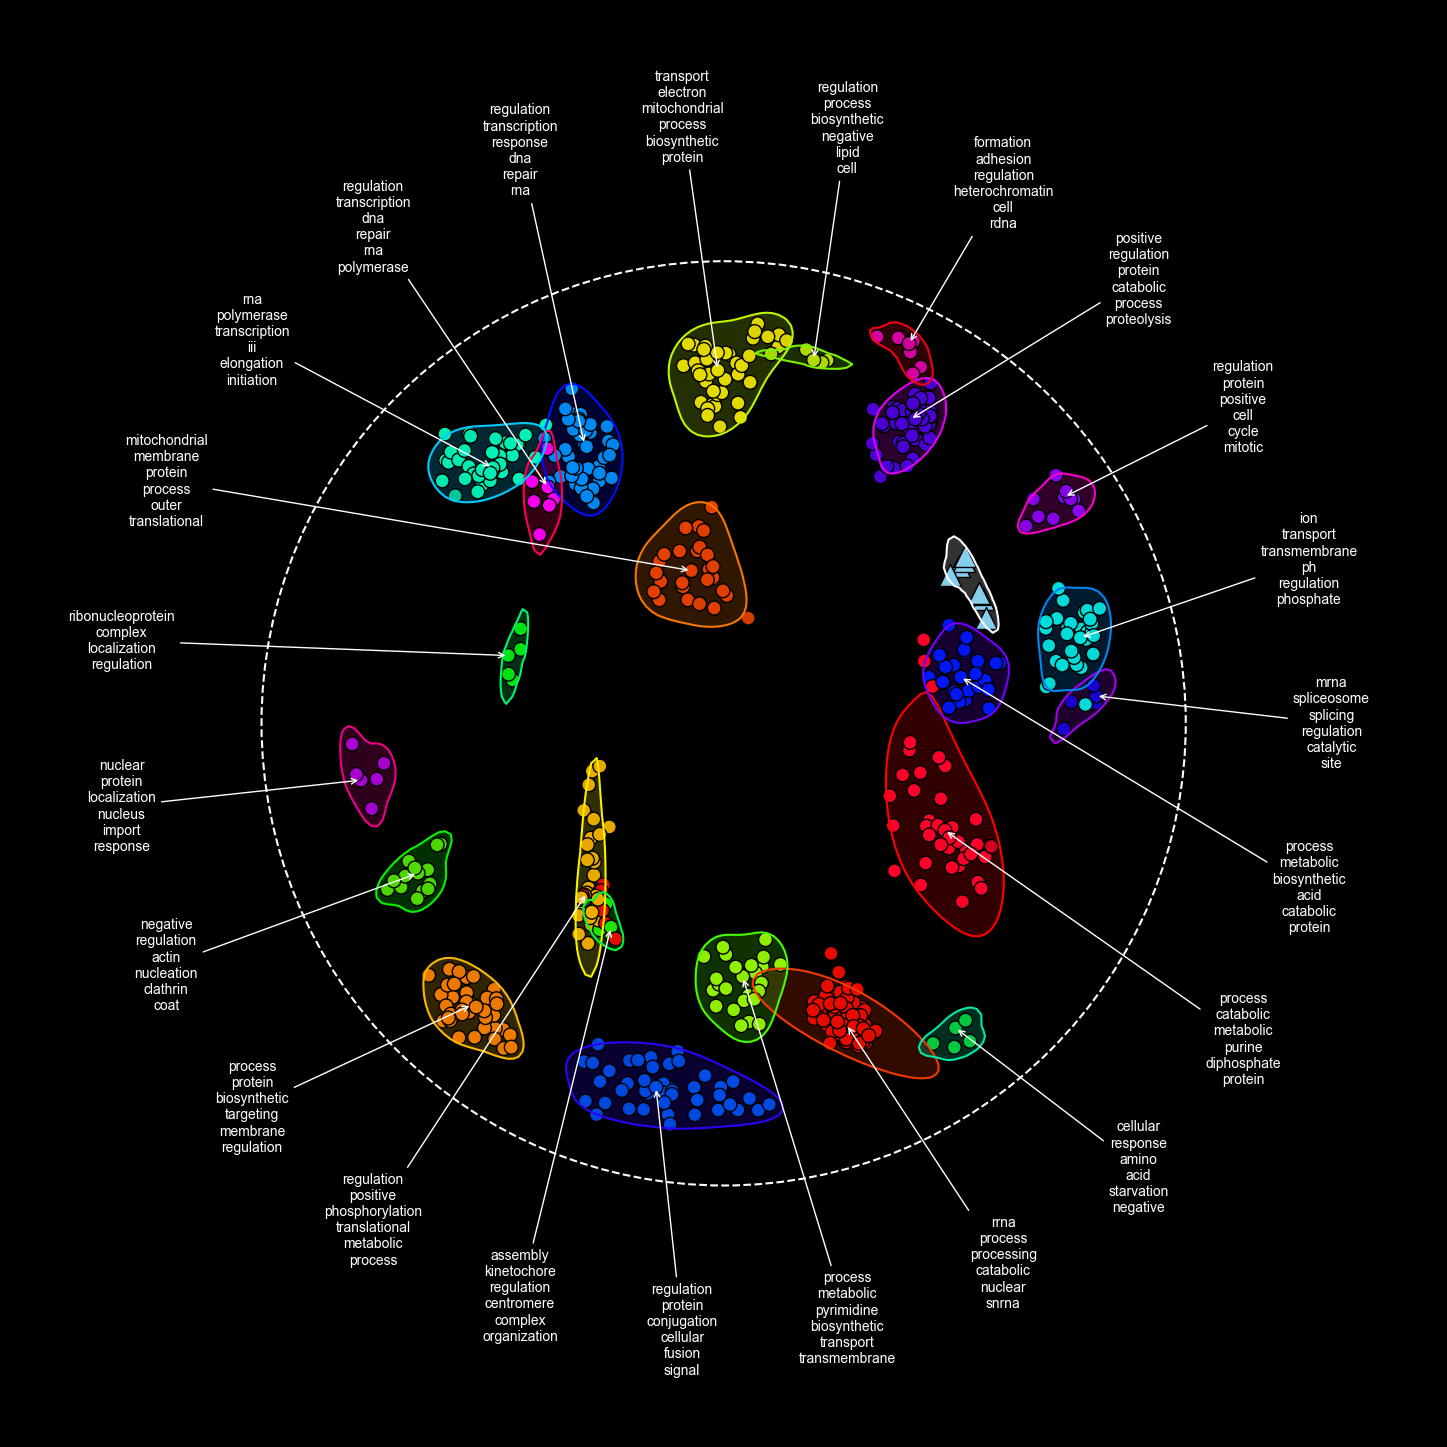

In [13]:
# Initialize the NetworkPlotter with the NetworkGraph object

plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
    plot_outline=True,
    outline_color="white",
    outline_scale=1.05,
)

# Optional: Plot network nodes and edges
plotter.plot_network(
    node_size=plotter.get_annotated_node_sizes(enriched_nodesize=100, nonenriched_nodesize=0),
    edge_width=0.0,
    node_color=plotter.get_annotated_node_colors(
        cmap="gist_rainbow",
        min_scale=0.5,
        max_scale=1.0,
        nonenriched_color="white",
        random_seed=887,
    ),
    node_edgecolor="black",
    edge_color="white",
    node_shape="o",
)

# Optional: Plot subnetwork
plotter.plot_subnetwork(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],
    node_size=250,
    edge_width=0.0,
    node_color="skyblue",
    node_edgecolor="black",
    edge_color="white",
    node_shape="^",
)

# Optional: Plot contours
plotter.plot_contours(
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    alpha=0.2,
    color=plotter.get_annotated_contour_colors(cmap="hsv", random_seed=887),
)

# Optional: Plot subcontour
plotter.plot_subcontour(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    alpha=0.2,
    color="white",
)

# Optional: Plot label
plotter.plot_labels(
    perimeter_scale=1.25,
    offset=0.10,
    font="Arial",
    fontsize=10,
    fontcolor="white",
    arrow_linewidth=1,
    arrow_color="white",
    num_words=6,
    min_words=2,
)

# Finally, display the plot
plotter.show()


---

## 8. Overview of `risk.params`

The `risk.params` module in the **RISK** package is designed to handle the management and export of various parameters related to network analysis. This module provides methods to load parameters, and export them to different formats including CSV, JSON, and plain text files. The key functionalities include:

- **Loading Parameters**: Centralizes all relevant parameters such as annotations, graph data, and plot configurations into a single dictionary, ensuring they are easily accessible for further processing.

- **Exporting Parameters**:
  - **`to_csv(filepath: str)`**: Exports the parameters to a CSV file, flattening any nested dictionaries for easy tabular representation.
  - **`to_json(filepath: str)`**: Saves the parameters in a JSON file, maintaining the structure of nested dictionaries for hierarchical data storage.
  - **`to_txt(filepath: str)`**: Outputs the parameters to a plain text file, organizing them in a human-readable format with clearly defined sections.

These methods ensure that the parameters are consistently formatted and ready for use in different contexts, whether for data sharing, storage, or documentation purposes.


## 8a. Loading Parameters

The `load` method gathers and processes various parameters, including annotations, network data, and plot settings, into a single dictionary. This method also converts `np.ndarray` values to lists, making them easier to handle in non-numeric contexts.


In [22]:
# Load the parameters into a dictionary
loaded_params = risk.params.load()
loaded_params


------------------
Loading parameters
------------------


{'annotations': {'filepath': './data/json/annotations/go_biological_process.json',
  'filetype': 'JSON'},
 'datetime': '2024-08-15 19:31:10',
 'graph': {'tail': 'right',
  'pval_cutoff': 0.01,
  'fdr_cutoff': 0.999,
  'impute_depth': 0,
  'prune_threshold': 0.1,
  'linkage_criterion': 'distance',
  'linkage_method': 'average',
  'linkage_metric': 'yule',
  'min_cluster_size': 5,
  'max_cluster_size': 1000},
 'neighborhoods': {'score_metric': 'stdev',
  'null_distribution': 'network',
  'num_permutations': 100,
  'random_seed': 887,
  'max_workers': 4},
 'network': {'compute_sphere': True,
  'surface_depth': 0.5,
  'distance_metric': 'dijkstra',
  'louvain_resolution': 0.01,
  'min_edges_per_node': 0,
  'edge_length_threshold': 0.25,
  'include_edge_weight': False,
  'weight_label': 'weight',
  'filetype': 'Cytoscape',
  'filepath': './data/cytoscape/michaelis_2023.cys'},
 'plotter': {'figsize': (15, 15),
  'background_color': 'black',
  'plot_outline': True,
  'outline_color': 'white',

---

## 8b. Exporting Parameters to CSV

The `to_csv` method in the **RISK** package allows you to export the parameters to a CSV file. This is useful for saving parameters in a format that is easily accessible for further analysis or sharing.


In [23]:
# Export parameters to a CSV file

risk.params.to_csv(filepath="./data/csv/params/michaelis_2023.csv")


------------------
Loading parameters
------------------
Parameters successfully exported to filepath: ./data/csv/params/michaelis_2023.csv


---

## 8c. Exporting Parameters to JSON

The `to_json` method provides functionality to export parameters to a JSON file, preserving the structure of nested dictionaries and making the data easy to share or load into other applications.

### Key Points:
- **Hierarchical Data Storage**: Preserves nested dictionary structures in a JSON format.
- **Readable Format**: The JSON file is indented to enhance readability.


In [24]:
# Export parameters to a JSON file

risk.params.to_json(filepath="./data/json/params/michaelis_2023.json")


------------------
Loading parameters
------------------
Parameters successfully exported to filepath: ./data/json/params/michaelis_2023.json


---

## 8d. Exporting Parameters to Text

The `to_txt` method allows parameters to be exported to a plain text file. This format is ideal for creating easily readable documentation of parameter settings.

### Key Points:
- **Organized Output**: Parameters are grouped by their keys, with nested values indented under their parent keys.
- **Human-Readable Format**: Output is formatted with clear sections and indentation.


In [26]:
# Export parameters to a text file

risk.params.to_txt(filepath="./data/txt/params/michaelis_2023.txt")


------------------
Loading parameters
------------------
An error occurred while exporting parameters to ./data/txt/params/michaelis_2023.txt: 'str' object has no attribute 'items'
